# SpaceShip Titanic

In [87]:
import seaborn as sns
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer

In [88]:


train = pd.read_csv(r'data\train.csv')
test = pd.read_csv(r'data\test.csv')

<AxesSubplot:>

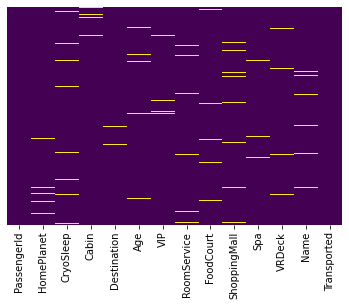

In [89]:

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [90]:

def impute_by_KNN(df,column_name):
    fact_col, lable = pd.factorize(df[column_name])
    imputer = KNNImputer(n_neighbors=5, weights="uniform", add_indicator = True)
    imputedHomePlanet = imputer.fit_transform([fact_col])
    imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
    df.drop(columns=column_name, inplace=True)
    df[column_name ] = imputedHomePlanet[0]
    return df
    

In [91]:
def impute_by_Simple_mean(df, column_name:list):
    imp = SimpleImputer( strategy='mean')
    imp.fit(df[column_name])
    transformed = imp.transform(df[column_name])
    # print(transformed)
    df = df.drop(df[column_name], axis = 1)
    df[column_name ] = transformed
    return df
    
    


In [92]:
# to_impute_num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
# for i in to_impute_num:
#     train = impute_by_Simple_mean(train, [i] )

In [93]:
# to_impute_knn = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
# for i in to_impute_knn:
#     train = impute_by_KNN(train,i)

In [94]:
# factHome, lable = pd.factorize(train['HomePlanet'])
# factHome

In [95]:
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5, weights="uniform", add_indicator = True)
# imputedHomePlanet = imputer.fit_transform([factHome])

<AxesSubplot:>

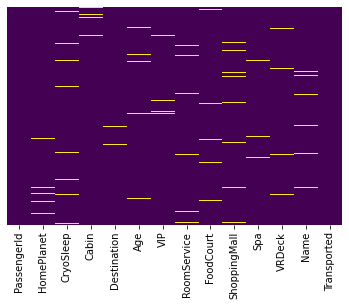

In [96]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Preserving Distict characters for Later Purpose

In [97]:

def remove_missing_values(df, to_impute_num, to_impute_knn):
    for i in to_impute_num:
        df = impute_by_Simple_mean(df, [i] )
    for i in to_impute_knn:
        df = impute_by_KNN(df,i)
    
    return df
    

Now the dataset Does not have any Null Values

In [98]:
to_impute_num = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
to_impute_knn = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']

In [99]:
train = remove_missing_values(train, to_impute_num, to_impute_knn)
test =  remove_missing_values(test, to_impute_num, to_impute_knn)

C:\Users\pwayk\AppData\Local\Temp/ipykernel_11768/2146097444.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_11768/2146097444.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_11768/2146097444.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputedHomePlanet =  pd.DataFrame([lable[i] for i in imputedHomePlanet[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_11768/2146097444.py:5: FutureWarning: Indexing with a float is deprecated,

In [100]:
Name = train['Name']
PassengerId =  train['PassengerId']
Cabin = train['Cabin']
train.drop(columns=['Name', 'PassengerId', 'Cabin'], inplace=True)

In [101]:
Name = test['Name']
PassengerId =  test['PassengerId']
Cabin = test['Cabin']
test.drop(columns=['Name', 'PassengerId', 'Cabin'], inplace=True)

In [102]:
train.to_csv(r'preprocessed_data\train_wo_missing.csv')
test.to_csv(r'preprocessed_data\test_wo_missing.csv')

<AxesSubplot:>

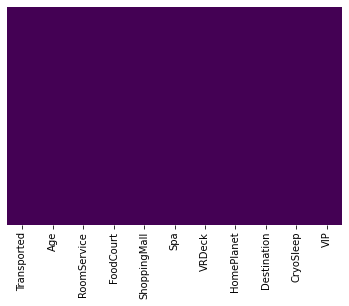

In [103]:

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Getting Dummies

In [104]:
dummies  = pd.get_dummies(train['HomePlanet'], drop_first = True)
# dummies  = pd.get_dummies(train['HomePlanet'])

In [105]:
dummies

,Europa,Mars
0,1,0
1,0,0
2,1,0
3,1,0
4,0,0
...,...,...
8688,1,0
8689,0,0
8690,0,0
8691,1,0


In [106]:
to_impute_knn

['HomePlanet', 'Destination', 'CryoSleep', 'VIP']

In [107]:
def encode(df, to_impute_knn):
    for i in to_impute_knn:
        dummies  = pd.get_dummies(df[i], drop_first = True, prefix=i)
        df = pd.concat([df,dummies], axis=1)
        df= df.drop(i, axis = 1)
    return df
        
    

In [108]:
train = encode(train, to_impute_knn)
test  = encode(test,to_impute_knn )

In [109]:
train['Transported'], lable= pd.factorize(train['Transported'])

In [110]:
train.to_csv(r'preprocessed_data\train_encoded.csv')
test.to_csv(r'preprocessed_data\test_encoded.csv')